# <font color=purple> Machine Learning

<font color=purple> **The objective of this project is twofold: to delve into the study of machine learning libraries while advancing further in the exploration of Jupyter Notebook and Python. The project encompasses a many dataset and offers a range of exercises involving those datasets.** <font>

Several practices will be employed in this study:

1- Below certain commands, there will be a summary of their meanings.

2- All text will be written in English.

3- The data has been extracted from exercises on the Alura platform.

# About

Our project aims to develop Alura_care, a fictional startup that aims to reduce the number of tests required for diagnosing a specific type of cancer. To achieve this, we will start by preprocessing the data, learning to identify, for example, empty cells and how to handle such issues. We will also identify constant values in the data and how they may or may not impact the classification process, as well as how correlation influences this same process.

Once done, we will begin automatic feature selection methods, such as SelectKBest and RFE. Additionally, we will determine which set will give us the best possible result in the classification process, how many features we will need, and what those features are.

Finally, we will learn how to visualize high-dimensional data on a plane, reducing the dimension while retaining as much information as possible.

In [36]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# SKlearn imports

from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Dataset

url_1 = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'

SEED = 123143
np.random.seed(SEED)

# Readers

data_1 = pd.read_csv(url_1)

In [2]:
# Checking dataset

data_1

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


In [3]:
# Checking data

data_1.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [4]:
# Creating train_test_split,  decided to remove the "exame_33" column, since we have a representative number of null values on it

exam_values = data_1.drop(columns=['id','diagnostico','exame_33'])
diagnostico = data_1.diagnostico


train_x, test_x, train_y, test_y = train_test_split(exam_values, diagnostico, test_size = 0.3)

# Checking train_x

train_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
268,12.87,16.21,82.38,103.78,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,...,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.786,0.0578,0.3604,0.07062
422,11.61,16.02,75.46,103.78,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,...,19.67,81.93,475.7,0.1415,0.2170,0.2302,0.786,0.1105,0.2787,0.07427
168,17.47,24.68,116.10,103.78,984.6,0.10490,0.16030,0.21590,0.10430,0.1538,...,32.33,155.30,1660.0,0.1376,0.3830,0.4890,0.786,0.1721,0.2160,0.09300
501,13.82,24.49,92.33,103.78,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,...,32.94,106.00,788.0,0.1794,0.3966,0.3381,0.786,0.1521,0.3651,0.11830
563,20.92,25.09,143.00,103.78,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.786,0.2542,0.2929,0.09873


In [5]:
# Creating classifier

classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(train_x, train_y)

print(f'Classifier Result: {(classifier.score(test_x,test_y) * 100).round(3)} %')

Classifier Result: 92.398 %


In [6]:
# Creating dummy classifier 

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(train_x, train_y)

print(f'Dummy Classifier Result: {(dummy.score(test_x,test_y) * 100).round(3)} %')

Dummy Classifier Result: 66.667 %


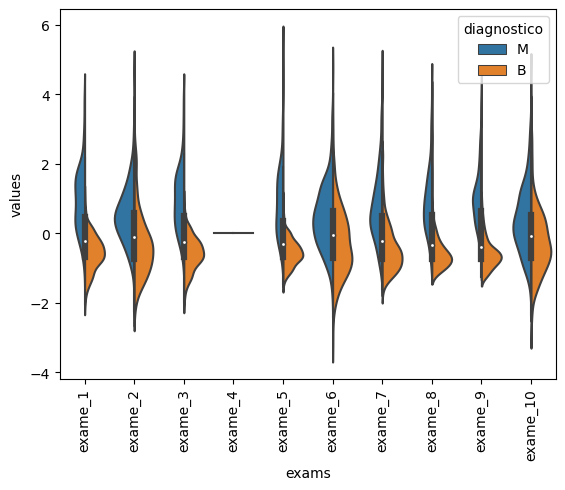

In [7]:
# Visualizing data

standard = StandardScaler()
standard.fit(exam_values)
exam_values_2 = standard.transform(exam_values)
exam_values_2 = pd.DataFrame(data = exam_values_2, columns=exam_values.keys())

data_plot = pd.concat([diagnostico, exam_values_2.iloc[:,0:10]], axis=1)
data_plot = pd.melt(data_plot, id_vars='diagnostico', var_name='exams', value_name='values')

sns.violinplot(x = 'exams', y = 'values', hue = 'diagnostico', data = data_plot, split=True)
plt.xticks(rotation=90);

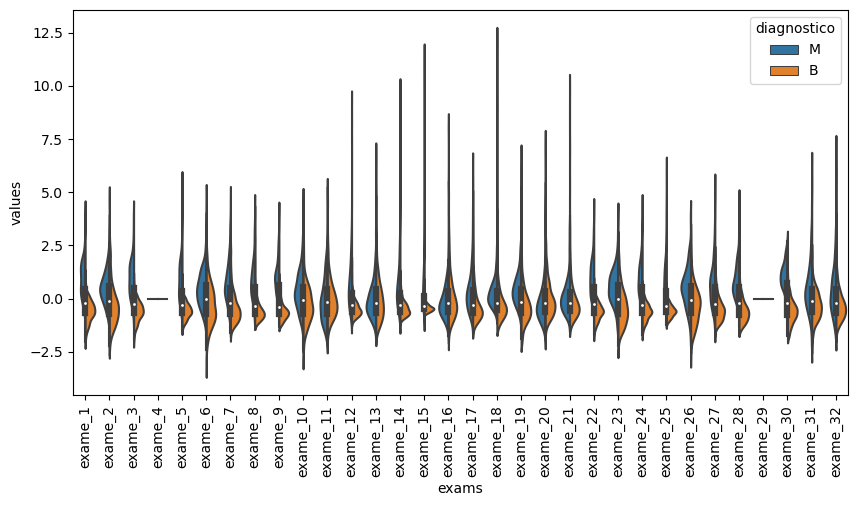

In [8]:
# Creating function to plot

def graphic_violin (values, start, end):
    data_plot = pd.concat([diagnostico, values.iloc[:,start:end]], axis=1)
    data_plot = pd.melt(data_plot, id_vars='diagnostico', var_name='exams', value_name='values')
    plt.figure(figsize=(10,5))

    sns.violinplot(x = 'exams', y = 'values', hue = 'diagnostico', data = data_plot, split=True)
    plt.xticks(rotation=90);

graphic_violin(exam_values_2, 0, 32)

In [9]:
# Creating new data without constant values

exam_values_3 = exam_values_2.drop(columns=['exame_4','exame_29'])

def classify(values):
    
    SEED = 1234
    random.seed(SEED)

    train_x, test_x, train_y, test_y = train_test_split(values, diagnostico, test_size = 0.3)
    classifier = RandomForestClassifier(n_estimators = 100)
    classifier.fit(train_x, train_y)
    
    print(f'Classifier Result: {(classifier.score(test_x,test_y) * 100).round(3)} %')

classify(exam_values_3)

Classifier Result: 92.982 %


<Axes: >

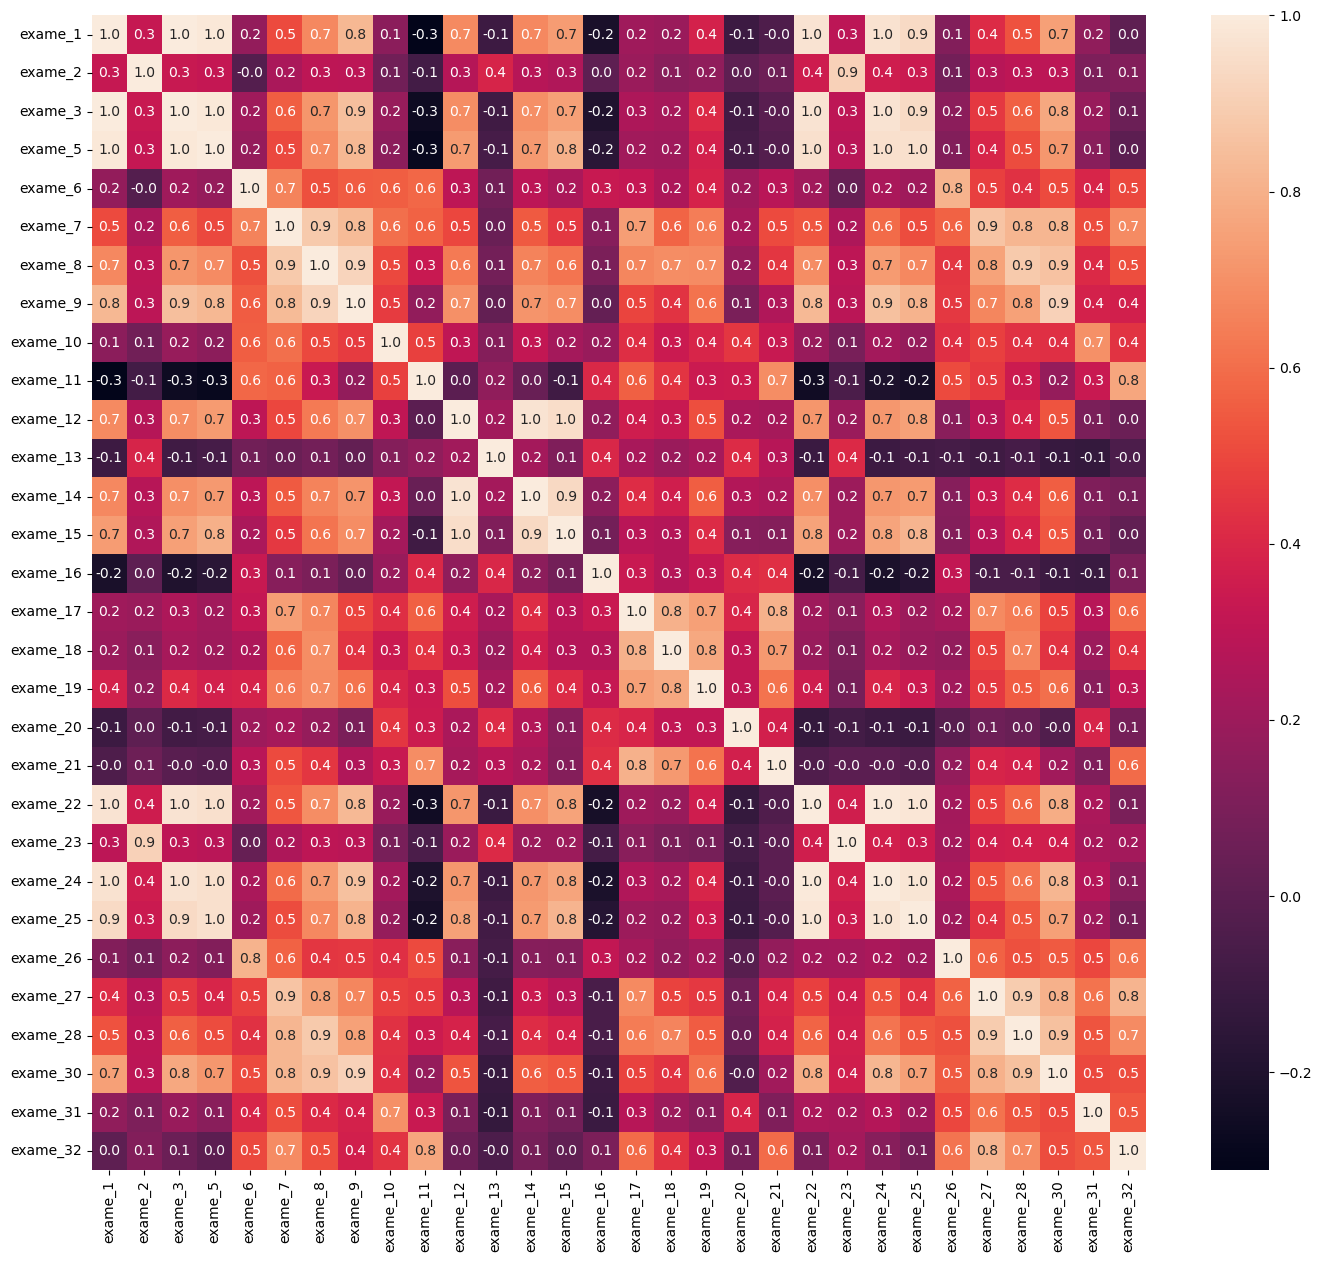

In [10]:
# Checking correlation matrix

corr_matrix = exam_values_3.corr()
plt.figure(figsize=(17,15))
sns.heatmap(corr_matrix, annot = True, fmt = '.1f')

In [11]:
# Checking all correlated values over 0.99

corr_matrix_v1 = corr_matrix[corr_matrix > 0.99]
corr_matrix_v1 = corr_matrix_v1.sum()
corr_variables = corr_matrix_v1[corr_matrix_v1 > 1]
corr_variables

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [12]:
# Removing corr_variables columns, since they are way too much correlated, need to choose between 'exame_1' or 'exame_3' & 'exame_22' or 'exame_24'

exam_values_4 = exam_values_3.drop(columns=['exame_3','exame_24'])
exam_values_4

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [13]:
# For now we excluded some columns keeping the accuracy of the classifier

classify(exam_values_4)

Classifier Result: 92.982 %


In [14]:
# Using SKBest

selecting_kbest = SelectKBest(chi2, k=5)
selecting_kbest

SelectKBest(k=5, score_func=<function chi2 at 0x000001D0C24B1260>)

In [15]:
# Train / test using skbest

SEED = 1234
random.seed(SEED)
kbest_data = exam_values.drop(columns=["exame_4", "exame_29", "exame_3", "exame_24"])


train_x, test_x, train_y, test_y = train_test_split(kbest_data, diagnostico, test_size = 0.3)

selecting_kbest.fit(train_x, train_y)
train_kbest = selecting_kbest.transform(train_x)
test_kbest = selecting_kbest.transform(test_x)

classifier = RandomForestClassifier(n_estimators=100, random_state=1234)
classifier.fit(train_kbest, train_y)
print(f'Classifier Result: {(classifier.score(test_kbest, test_y) * 100).round(3)} %')

Classifier Result: 92.398 %


[Text(0.5, 20.049999999999997, 'Prediction'), Text(47.25, 0.5, 'Real')]

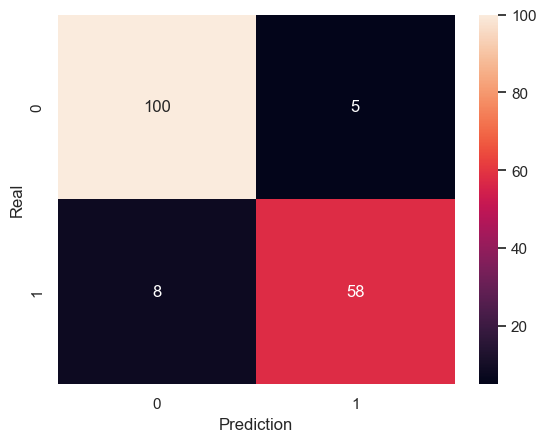

In [16]:
# Applying Confusion Matrix

confusion_matrix = confusion_matrix(test_y, classifier.predict(test_kbest))
sns.set()
sns.heatmap(confusion_matrix, annot = True, fmt = 'd').set(xlabel = 'Prediction', ylabel='Real')

Classifier Result: 90.058 %


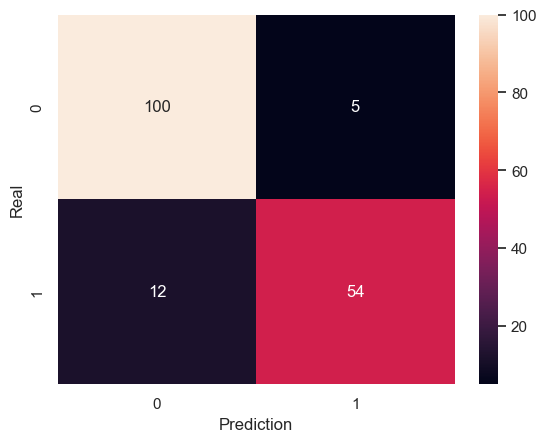

In [17]:
# Applying RFE

SEED = 1234
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(kbest_data, diagnostico, test_size=0.3)

classifier = RandomForestClassifier(n_estimators=100, random_state=1234)
classifier.fit(train_x, train_y)

rfe_selector = RFE(estimator=classifier, n_features_to_select=5, step=1)
rfe_selector.fit(train_x, train_y)

train_rfe = rfe_selector.transform(train_x)
test_rfe = rfe_selector.transform(test_x)

classifier.fit(train_rfe, train_y)

conf_matrix = confusion_matrix(test_y, classifier.predict(test_rfe))
sns.set()
sns.heatmap(conf_matrix, annot=True, fmt='d').set(xlabel='Prediction', ylabel='Real')

print(f'Classifier Result: {(classifier.score(test_rfe, test_y) * 100).round(3)} %')

Classifier Result: 92.982 %


[Text(0.5, 20.049999999999997, 'Prediction'), Text(47.25, 0.5, 'Real')]

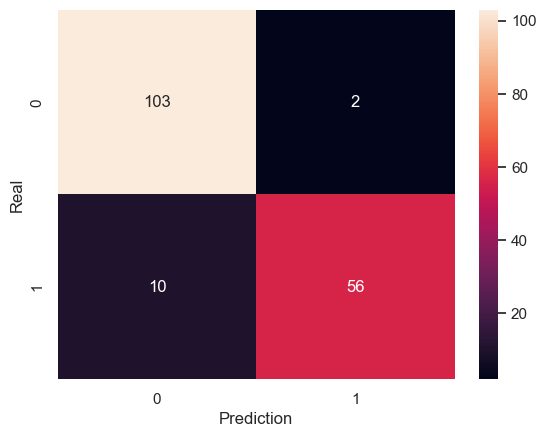

In [19]:
# Using RFE Cross Validation (RFECV) to check what are the best blocks

SEED = 1234
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(kbest_data, diagnostico, test_size=0.3)

classifier = RandomForestClassifier(n_estimators=100, random_state=1234)
classifier.fit(train_x, train_y)

rfecv_selector = RFECV(estimator=classifier, cv=5, scoring="accuracy", step=1)
rfecv_selector.fit(train_x, train_y)

train_rfecv = rfecv_selector.transform(train_x)
test_rfecv = rfecv_selector.transform(test_x)

classifier.fit(train_rfecv, train_y)
print(f'Classifier Result: {(classifier.score(test_rfecv, test_y) * 100).round(3)} %')

conf_matrix = confusion_matrix(test_y, classifier.predict(test_rfecv))
sns.set()
sns.heatmap(conf_matrix, annot=True, fmt='d').set(xlabel='Prediction', ylabel='Real')

<function matplotlib.pyplot.show(close=None, block=None)>

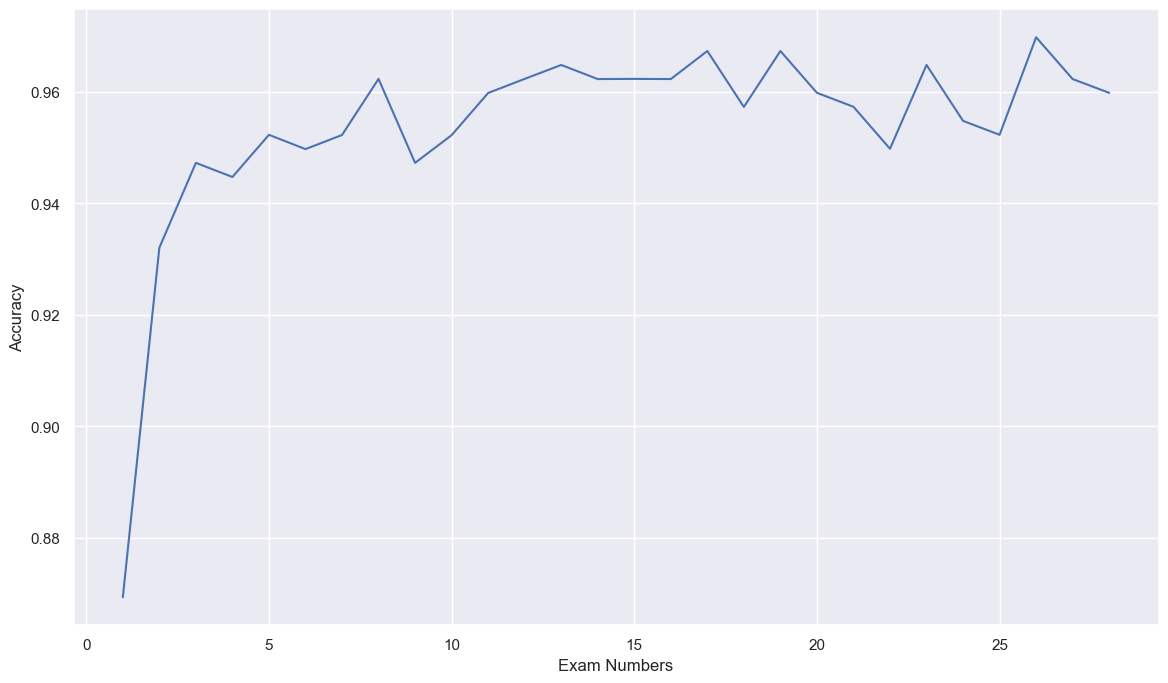

In [24]:
# Indications of best configuration possible

plt.figure(figsize=(14, 8))
plt.xlabel("Exam Numbers")
plt.ylabel("Accuracy")

plt.plot(range(1, len(rfecv_selector.cv_results_['mean_test_score']) + 1), rfecv_selector.cv_results_['mean_test_score'])
plt.show

In [28]:
# Creating new rfe selector using 2 n_features

rfe_selector = RFE(estimator=classifier, n_features_to_select=2, step=1)
selected_features = rfe_selector.fit_transform(train_x, train_y)

exam_values_5 = rfe_selector.transform(exam_values_4)
exam_values_5.shape

(569, 2)

<Axes: >

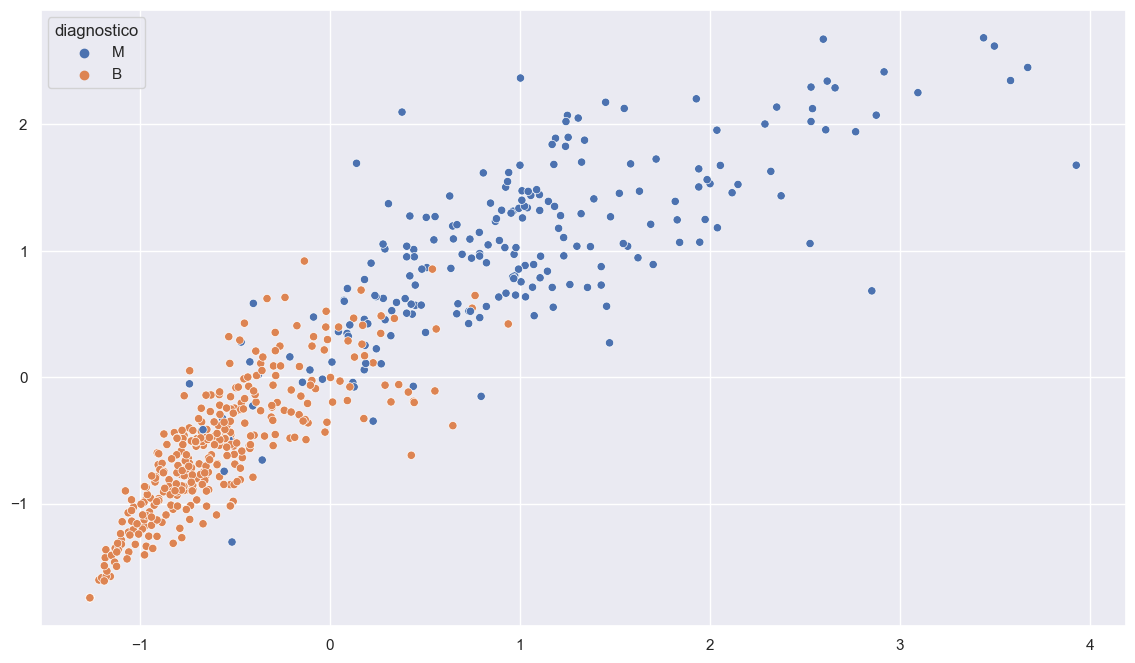

In [30]:
# Selecting only 2 features is not enough for this case

plt.figure(figsize=(14,8))
sns.scatterplot(x = exam_values_5[:,0], y= exam_values_5[:,1], hue=diagnostico)

<Axes: >

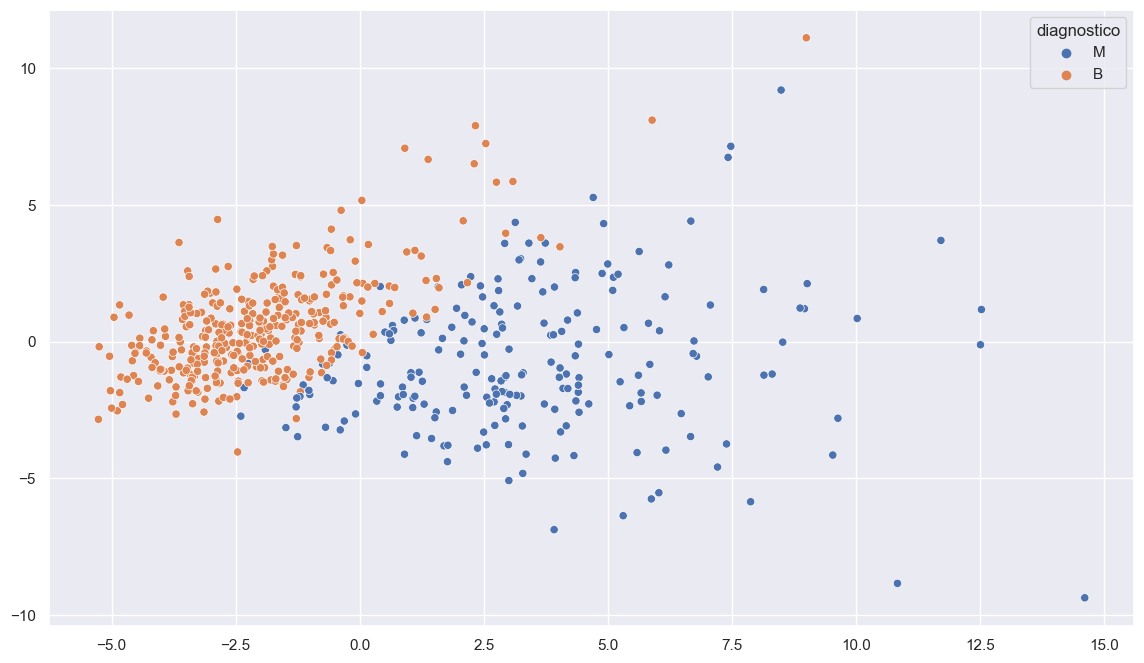

In [35]:
# Applying PCA

pca = PCA(n_components=2)
exam_values_6 = pca.fit_transform(exam_values_4)
plt.figure(figsize=(14,8))
sns.scatterplot(x = exam_values_6[:,0], y= exam_values_6[:,1], hue=diagnostico)

<Axes: >

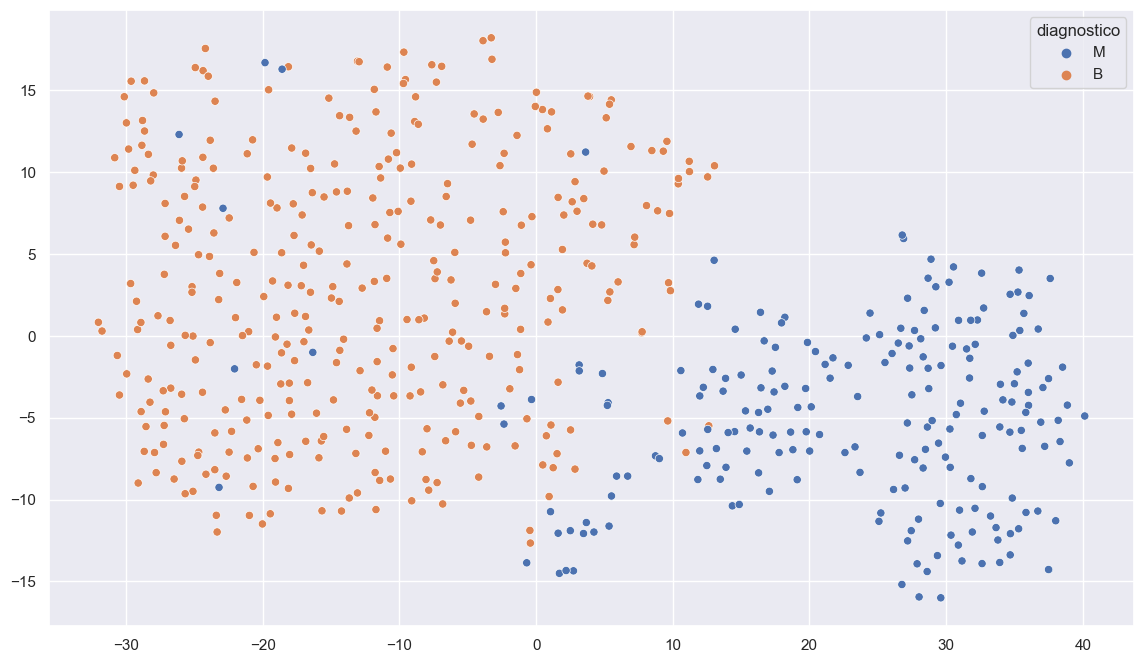

In [39]:
# Applying TSNE

tsne = TSNE(n_components=2)
exam_values_7 = tsne.fit_transform(exam_values_4)
plt.figure(figsize=(14,8))
sns.scatterplot(x = exam_values_7[:,0], y= exam_values_7[:,1], hue=diagnostico)